In [1]:
import HEAD_RECON
import multi_head
import copy
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage.morphology import binary_fill_holes
import sys
np.set_printoptions(threshold=sys.maxsize)

%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

1
(307200,)
dangling removal done
color filter done.


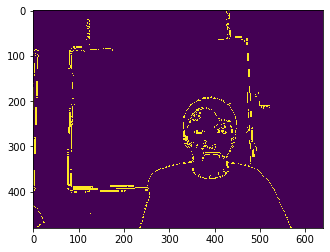

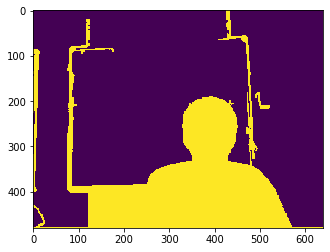

2
(307200,)
dangling removal done
color filter done.


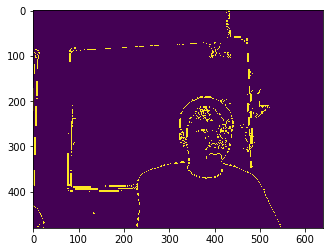

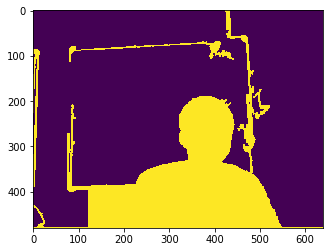

3
(307200,)
dangling removal done
color filter done.


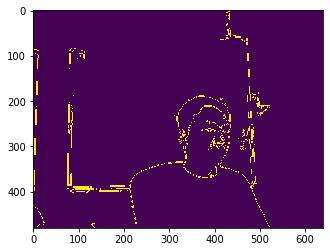

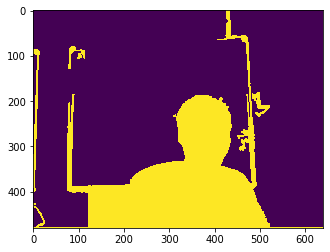

4
(307200,)
dangling removal done
color filter done.


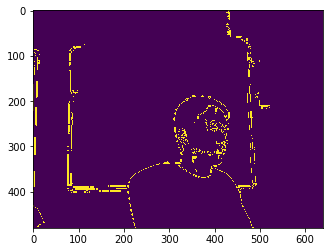

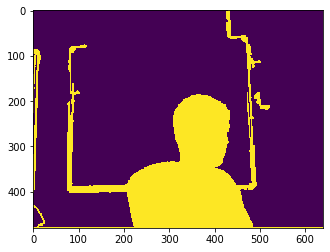

5
(307200,)
dangling removal done
color filter done.


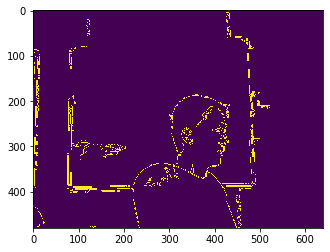

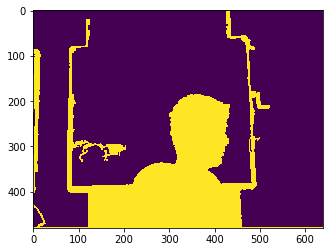

6
(307200,)
dangling removal done
color filter done.


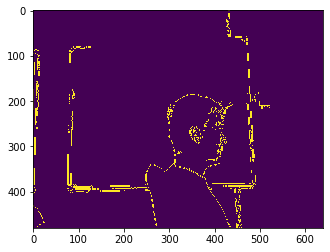

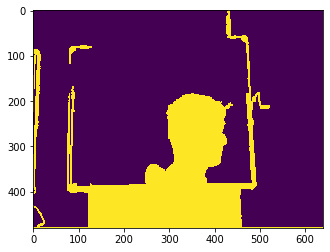

7
(307200,)
dangling removal done
color filter done.


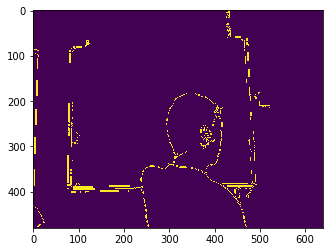

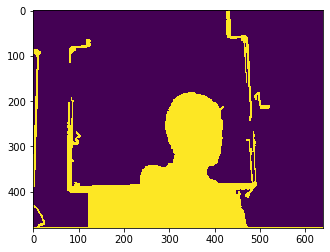

8
(307200,)
dangling removal done
color filter done.


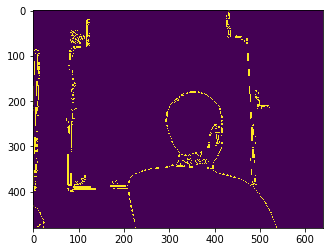

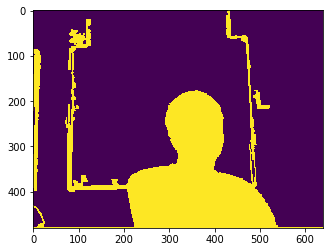

9
(307200,)
dangling removal done
color filter done.


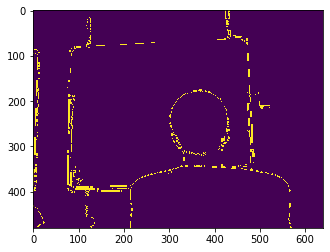

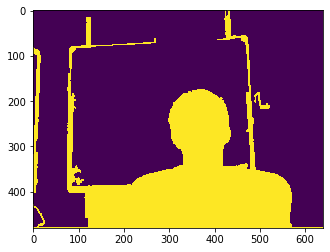

10
(307200,)
dangling removal done
color filter done.


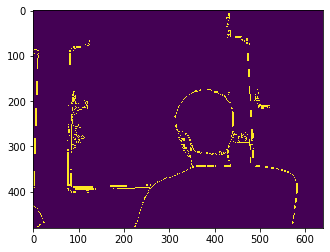

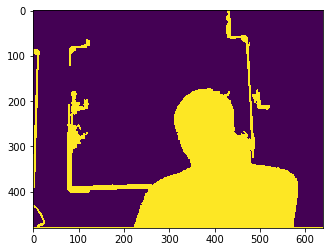

11
(307200,)
dangling removal done
color filter done.


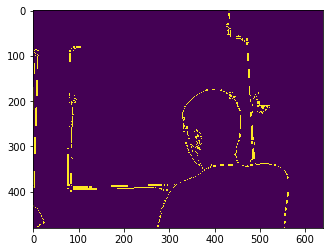

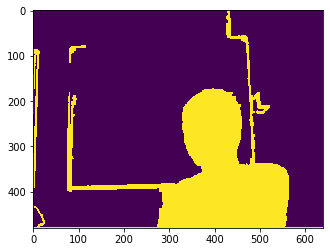

12
(307200,)
dangling removal done
color filter done.


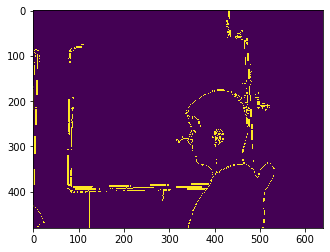

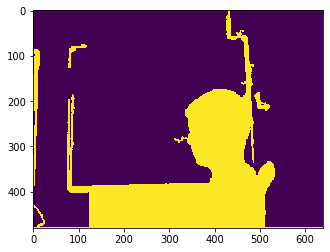

13
(307200,)
dangling removal done
color filter done.


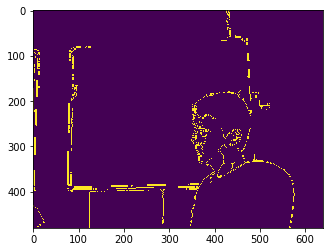

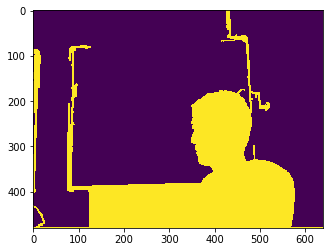

14
(307200,)
dangling removal done
color filter done.


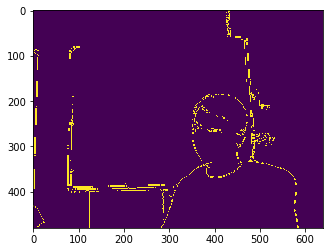

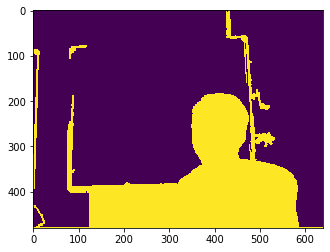

15
(307200,)
dangling removal done
color filter done.


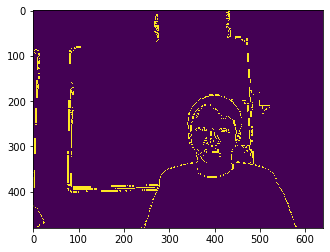

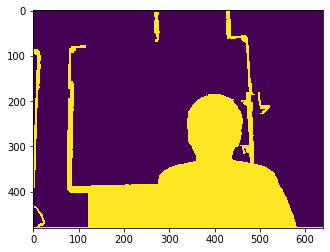

In [4]:
# gen 2d images
for i in range(1,16):
    print(i)
    head = HEAD_RECON.threeD_head.read_from_file(1,i)
    head.reset_filters()
    head.filter_nan()
#     head.filter_depth(1.5)
    head.sparsify(1)
#     head.remove_dangling()
    print("dangling removal done")
#     head.remove_background_color()
    print("color filter done.")
    head.edge_based_filter()
    head.erode_filter(5)
    head.filter_depth(1.5)
    head.remove_dangling()
    head.center()
    head.get_filtered_image()
    head.create_vpython_spheres()
    head.save()

In [ ]:
# gen pickled heads
for p in range(2,5):
    for i in range(1,16):
        print(i)
        head = HEAD_RECON.threeD_head.read_from_file(p,i)
        head.full_filter()
        head.get_filtered_image()

1
(307200,)
depth filter done.
dangling removal done
color filter done.
2
(307200,)
depth filter done.
dangling removal done
color filter done.
3
(307200,)
depth filter done.
dangling removal done
color filter done.
4
(307200,)
depth filter done.
dangling removal done
color filter done.
5
(307200,)
depth filter done.
dangling removal done
color filter done.
6
(307200,)
depth filter done.
dangling removal done
color filter done.
7
(307200,)
depth filter done.
dangling removal done
color filter done.
8
(307200,)
depth filter done.
dangling removal done
color filter done.
9
(307200,)
depth filter done.
dangling removal done
color filter done.
10
(307200,)
depth filter done.
dangling removal done
color filter done.
11
(307200,)
depth filter done.
dangling removal done


In [3]:
# load heads
all_heads=[HEAD_RECON.threeD_head.load_from_pickle(1,i) for i in range (1,16)]

In [4]:
def make_mhead(all_heads, first, last):
    all_heads[first].paint([1,0,0])
    all_heads[first].reset_positions()
    all_heads[first].reset_colors()
    all_heads[first+1].reset_positions()
    all_heads[first+1].reset_colors()    
    
    heads = multi_head.MultiHead.joined_heads(all_heads[first], all_heads[first+1])
#     heads.icp_transform(0,1)
    for i in range(first+2,last+1):
        all_heads[i].reset_positions()
        all_heads[i].reset_colors()  
        print (i)
        heads.append_head(all_heads[i])
        heads.join_heads_wraper(i-1-first,i-first)
#         heads.icp_transform(i-1-first,i-first)
    heads.save(sparcity=1) 
    print ("completed")
    return heads

In [5]:
heads = make_mhead(all_heads,0,7)

(1257, 128)



2


(1219, 128)




0 min_error True params: [ 0.02 14.    0.5 ]
(1219, 128)



3


(1242, 128)




0 min_error True params: [ 0.02 14.    0.5 ]
(1242, 128)



4


(1327, 128)




0 min_error True params: [ 0.02 14.    0.5 ]
(1327, 128)



5


(1329, 128)




0 min_error True params: [ 0.02 14.    0.5 ]
(1329, 128)



6


(1281, 128)




0 min_error True params: [ 0.02 14.    0.5 ]
(1281, 128)



7


(1331, 128)




0 min_error True params: [ 0.02 14.    0.5 ]
(1331, 128)



Saving Completed
completed


In [7]:
heads.create_mesh()

In [ ]:
make_mhead(all_heads,0,1)